## Analyse the Publications data from Kenya¶
So we managed to download about 14485 paper abstracts with meta-data from Kenyan Authors. Now we need to make sense of these data and identify trends. We are asking questions like:

1. Changes in the number of papers published over time (Yearly)
2. Changes in the number of open access papers over the years (Keep in mind that access or the lack thereof may be linked to embargo periods)
3. Collaboration trends (How can we get this information?
4. What else can we find out?

In [2]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

/home/icipe/miniconda3/envs/jupyter/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  


We began by installing matplotlib to assisting in plotting of the data 

In [3]:
from ggplot import *

/home/icipe/miniconda3/envs/jupyter/lib/python3.5/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/icipe/miniconda3/envs/jupyter/lib/python3.5/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


In [ ]:
from plotnine import *

In [20]:
data = pd.read_csv('../data/PMID_PMC_Journal_Year_Kenya3.csv', index_col='Pmid')

In [21]:
data.head()

,Journal,Year,Month,Pmcid,Status
Pmid,,,,,
10022051,Preventive veterinary medicine,1999.0,1.0,NaN,closed
10024569,Infection and immunity,1999.0,3.0,PMC96455,open
10030753,Veterinary parasitology,1999.0,2.0,NaN,closed
10048769,Journal of interferon & cytokine research : th...,1999.0,1.0,NaN,closed
10048831,International journal for parasitology,1999.0,1.0,NaN,closed


In [22]:
data.columns

Index(['Journal', 'Year', 'Month', 'Pmcid', 'Status'], dtype='object')

In [27]:
data.Year.head

<bound method NDFrame.head of Pmid
10022051    1999.0
10024569    1999.0
10030753    1999.0
10048769    1999.0
10048831    1999.0
10065173    1998.0
10065187    1998.0
10065191    1998.0
10065209    1998.0
10065211    1998.0
10065215    1998.0
10072132    1999.0
10079660    1999.0
10081789    1999.0
10085580    1999.0
10085737       NaN
10091883    1999.0
10098831    1999.0
10112436       NaN
10115342       NaN
10116060       NaN
10143454    1995.0
10148798    1993.0
10150531    1995.0
10160373    1996.0
10178582       NaN
10186568    1998.0
10186570    1998.0
10188179       NaN
10192093    1998.0
             ...  
9810280     1998.0
9813835     1998.0
9820853     1998.0
9824823     1998.0
9824824     1998.0
9824826     1998.0
9839036     1996.0
9841855     1999.0
9850385        NaN
9850516     1998.0
9850545     1998.0
9850546     1998.0
9852954     1998.0
9861369        NaN
9861404        NaN
9864005     1998.0
9868658     1998.0
9870366     1998.0
9872757     1999.0
9876212        

## Number of Journals per Year
Now we need to check if the number of Journals Published By Kenyans over the years.

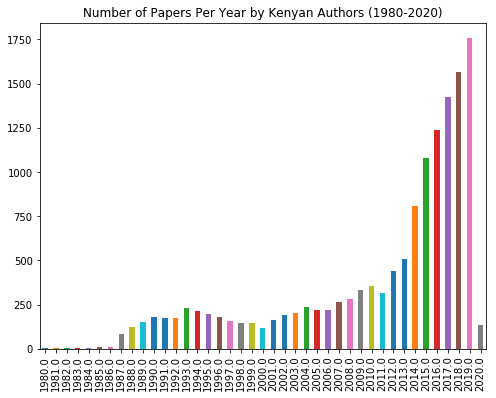

In [24]:
data['Year'].\
value_counts().sort_index().plot(kind='bar',
                                 title='Number of Papers Per Year by Kenyan Authors (1980-2020)',
                                 figsize=(8, 6))

plt.savefig('../plots/papers_per_year_Kenya.png')  # saves the current figure

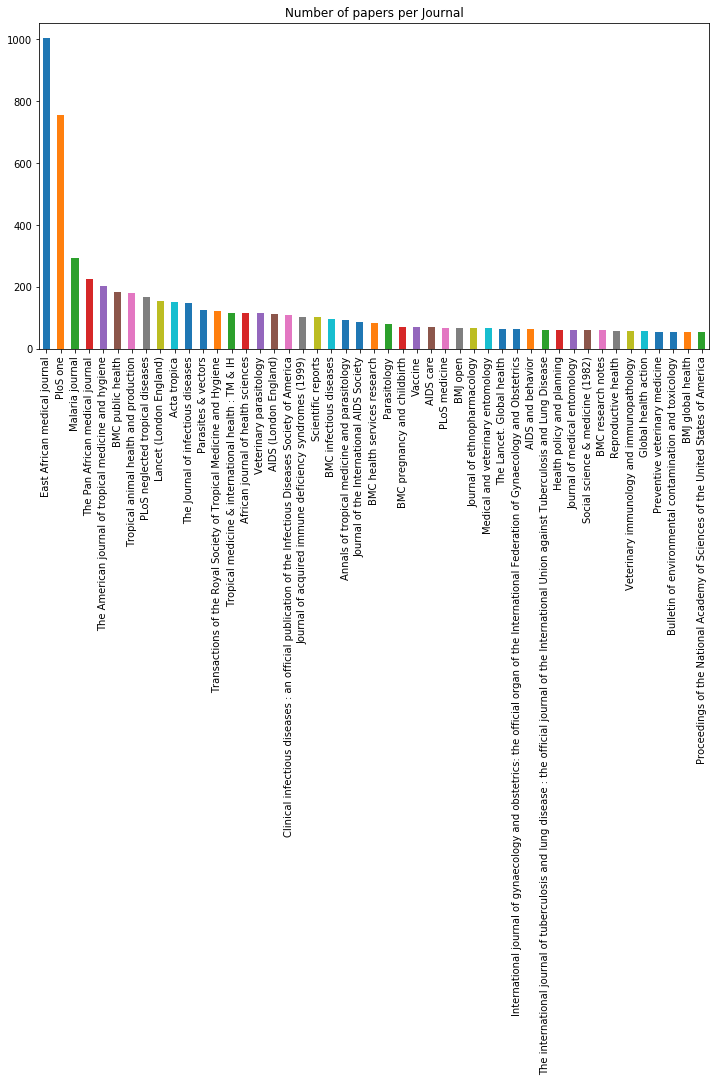

In [25]:
plot_journals = data.Journal.value_counts()[data.Journal.value_counts() > 50]
plot_journals.plot(kind='bar', title='Number of papers per Journal', figsize=(12, 6))
plt.savefig('../plots/papers_per_jornal_kenya.png')  # saves the current figure


From the figure above, we can observe that the East Africa Medical Journal is by far the most popular followed by Plos One Journal for Kenyan Authors. This is followed in a distant second by Malaria Journal. Most of these are journals specific to the diseases affecting Africa: Malaria and Neglected Tropical Diseases.

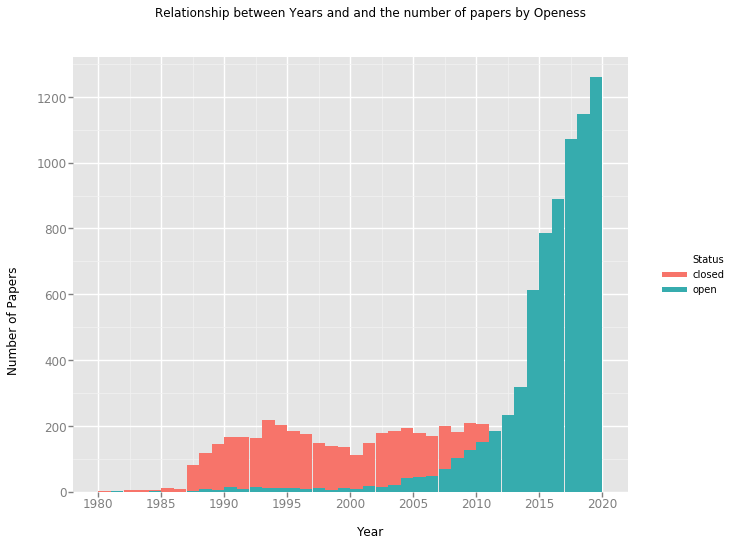

In [26]:
#P=ggplot(data, aes(x='Year', fill='Status')) +geom_histogram(binwidth=1) + \
#ggtitle("Relationship between Years and the number of papers by Openess") + xlab("Year") + ylab("Number of Papers")
#P
#P.save('plot1.png')
p=ggplot(data, aes(x='Year', fill='Status')) +\
    geom_histogram(binwidth=1) + \
ggtitle("Relationship between Years and and the number of papers by Openess") \
+ xlab("Year") + ylab("Number of Papers")

p.save('../plots/statusOpennessYear_Kenya.png')

in this diagram we can observe an increase in the number of open access articles (articles that do contain a pmcid)  as we close towards the 21 century(2000-2020) and a reduction in the closed access paper ( articles that donot contain a pmcid) 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


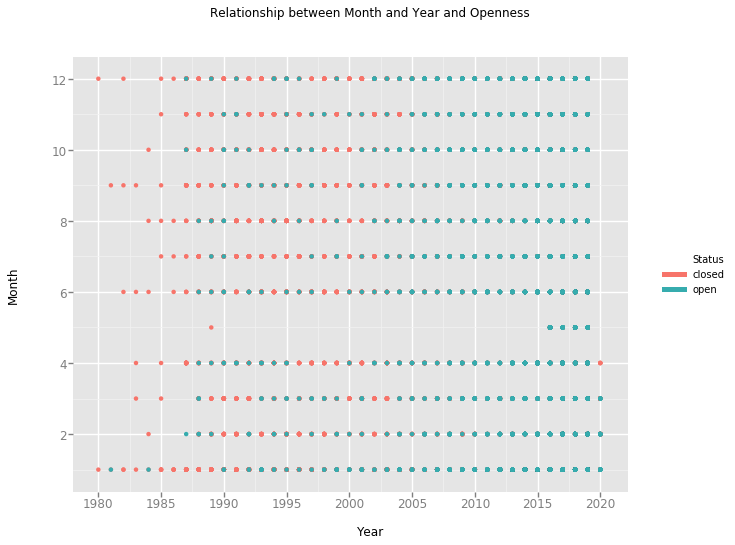

In [29]:
A=ggplot(data , aes(x = 'Year', y = 'Month',
                color='Status')) + geom_point() + \
ggtitle("Relationship between Month and Year and Openness") \
+ xlab("Year") + ylab("Month")

#save 
A.save('../plots/statusOpennessYear_months.png')